<a href="https://colab.research.google.com/github/Janeth172/EDP1/blob/main/CAMACHO%20SALVADOR-Colocaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MÉTODO DE COLOCACIÓN**

Considere el problema de valor inicial
$
u'' + u = x
$
con condiciones $u(0) = 0$ y $u'(0) = 2$. Encuentre una solución aproximada de la forma
$$
u_N = \alpha_0 + \alpha_1 x + \alpha_2 x^2 + \alpha_3 x^3 + \cdots
$$

* Elija $\alpha_0$ y $\alpha_1$ para satisfacer las condiciones dadas.

* Defina $\varepsilon = u''_N + u_N - x$, y encuentre $\varepsilon$ en este caso


Restringiendo $u_N$ a ser un cúbico, use $x = \tfrac{1}{2}$ y $x = 1$ como puntos de colocación para encontrar una solución aproximada.

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = sp.symbols('x') # introducir variable
u = sp.Function('u') # una funcion

In [ ]:
ode = u(x).diff(x, x) + u(x) - x
sp.dsolve(ode, u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

In [ ]:
sol = sp.dsolve ( ode, ics= {u(0): 0, u(x).diff(x, 1).subs(x, 0): 2})
sol

Eq(u(x), x + sin(x))

In [ ]:
u_expr = sol.rhs
u_expr

u_num = sp.lambdify(x, u_expr, "numpy")

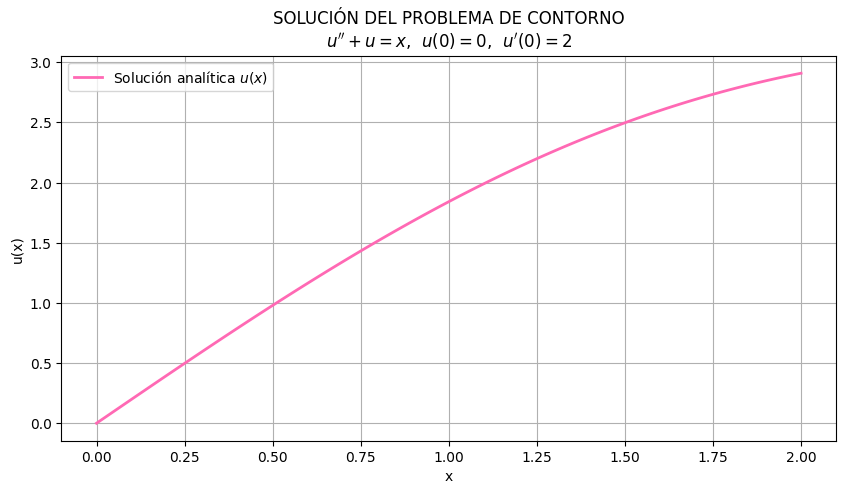

In [ ]:
xx = np.linspace(0, 2, 100)
yy = u_num(xx)

plt.figure(figsize=(10,5))
plt.plot(xx, yy, color='hotpink',label='Solución analítica $u(x)$', linewidth=2)
plt.title("SOLUCIÓN DEL PROBLEMA DE CONTORNO\n$u'' + u = x$,  $u(0)=0$,  $u'(0)=2$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

Con las funciones de prueba

In [ ]:
a, b = sp.symbols('a b')

#FUNCIÓN DE PRUEBA u_n(x) que cumple u(0)= 0 y u'(0)=2
# y CUMPLE SER CÚBICA
u_n = 2*x + a*x**2 + b*x**3
u_n

a*x**2 + b*x**3 + 2*x

In [ ]:
# Segunda derivada
u_n_2 = sp.diff(u_n, x, 2)
u_n_2


F = u_n_2 + u_n
F

a*x**2 + b*x**3 + 2*x + 2*(a + 3*b*x)

In [ ]:
# PUNTOS DE COLOCACIÓN

points = [sp.Rational(1,2), sp.Rational(1,1)]
points

[1/2, 1]

In [ ]:
eqs = [sp.Eq(F.subs(x, p), p) for p in points]

# RESOLVER PARA a y b
sol_1 = sp.solve(eqs, [a, b])

In [ ]:
for eq in eqs:
    print(eq)
    print("Sistema de ecuaciones simbólico")
for eq in eqs:
    sp.pprint(eq)

    sol_1

Eq(9*a/4 + 25*b/8 + 1, 1/2)
Sistema de ecuaciones simbólico
Eq(3*a + 7*b + 2, 1)
Sistema de ecuaciones simbólico
9⋅a   25⋅b          
─── + ──── + 1 = 1/2
 4     8            
3⋅a + 7⋅b + 2 = 1


In [ ]:
#SUSTITUIR a Y b EN LA FUNCION DE PRUEBA

u_approx = u_n.subs(sol_1)
u_approx

-2*x**3/17 - x**2/17 + 2*x

In [ ]:
# CONVERTIR EN FUNCIÓN NUMERICA
u_approx_fn = sp.lambdify(x, u_approx, 'numpy')

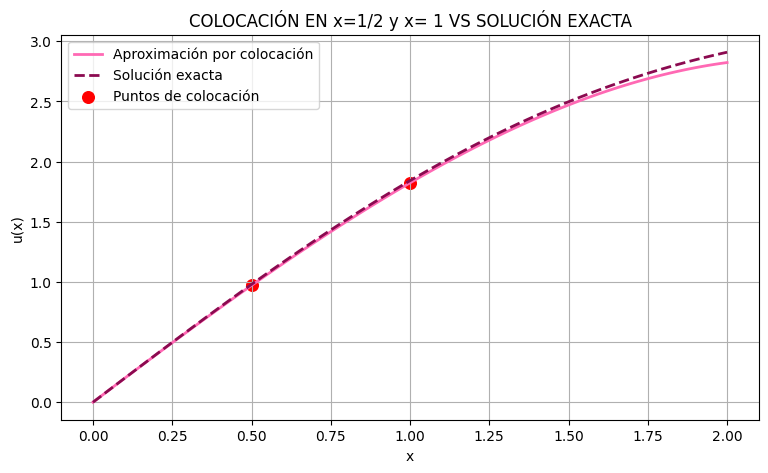

In [ ]:
# SOLUCIÓN ANALÍTICA Y NUMÉRICA
xx = np.linspace(0, 2, 100)

plt.figure(figsize=(9,5))
plt.plot(xx, u_approx_fn(xx), color='hotpink', label = 'Aproximación por colocación', linewidth=2)
plt.plot(xx, yy, "--", color="#8B0A50", label = "Solución exacta", linewidth=2)

# puntos de colocacion
plt.scatter([0.5, 1.0], u_approx_fn(np.array([0.5, 1.0])),
            color = "red", s=70, label = "Puntos de colocación")

plt.title("COLOCACIÓN EN x=1/2 y x= 1 VS SOLUCIÓN EXACTA")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid()
plt.show()

Calculando el error máximo

In [24]:
# SOLUCIÓN EXACTA
u_exact = x + sp.sin(x)

# Solución aproximada por colocación
u_approx = 2*x - (1/17)*x**2 - (2/17)*x**3

# Convertir a funciones numéricas
u_exact_fn = sp.lambdify(x, u_exact, 'numpy')
u_approx_fn = sp.lambdify(x, u_approx, 'numpy')


In [25]:
xx = np.linspace(0, 1, 200)

yy_exact = u_exact_fn(xx)
yy_approx = u_approx_fn(xx)


In [26]:
error_abs = np.abs(yy_exact - yy_approx)

In [27]:
error_max = np.max(error_abs)
print("Error máximo:", error_max)

Error máximo: 0.017941573043190218
